# Storytelling

This is data storytelling about life expectancy around the world. The target audience is general

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
plt.rcParams["figure.figsize"] = (10, 10)


In [2]:
# Source: https://www.kaggle.com/deepcontractor/human-life-expectancy-around-the-world
df = pd.read_csv('/home/parkerburchett/Documents/GitHub/SpringBoard/StoryTellingWithData/Human_life_Expectancy.csv')
df = df.replace('Not Available', np.nan)
for col in df.columns[4:]:
    df[col] = pd.to_numeric(df[col])
df.drop(columns=['Country_Code','Level'], inplace=True)
df.dtypes
countries = df['Country'].unique()

In [3]:
# bad best practice I should refactor to pass in some kind of function
def compute_std_life_span_by_year(df):
    regions = df[df['Region']!='Total']
    std_df = pd.DataFrame(regions.iloc[:, 4:].std(axis=0)).T
    std_df.insert(0,'Stat','Standard Dev')
    std_df.insert(0,'Country',df['Country'].unique()[0])
    return std_df

def compute_max_life_span_by_year(df):
    regions = df[df['Region']!='Total']
    max_df = pd.DataFrame(regions.iloc[:, 4:].max(axis=0)).T
    max_df.insert(0,'Stat','Max')
    max_df.insert(0,'Country',df['Country'].unique()[0])
    return max_df

def compute_min_life_span_by_year(df):
    regions = df[df['Region']!='Total']
    min_df = pd.DataFrame(regions.iloc[:, 4:].min(axis=0)).T
    min_df.insert(0,'Stat','Min')
    min_df.insert(0,'Country',df['Country'].unique()[0])
    return min_df

def compute_total_life_span_by_year(df):
    total_df = df[df['Region']=='Total'].iloc[:, 4:]
    total_df.insert(0,'Stat','Total')
    total_df.insert(0,'Country',df['Country'].unique()[0])
    return total_df


def compute_summary_df(df):
    total_df = compute_total_life_span_by_year(df)
    std_df = compute_std_life_span_by_year(df)
    max_df = compute_max_life_span_by_year(df)
    min_df = compute_min_life_span_by_year(df)
    summary_df = pd.concat([total_df,std_df,max_df,min_df])
    return summary_df

def calc_all_summary_df(df):
    countries = df['Country'].unique()
    summary_dfs = []
    for country in countries:
        country_df = df[df['Country'] == country]
        summary_df = compute_summary_df(country_df)
        summary_dfs.append(summary_df)
    
    full_df =  pd.concat(summary_dfs)
    return full_df.set_index(['Stat', 'Country'])

summary_df = calc_all_summary_df(df)
summary_df

,,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Stat,Country,,,,,,,,,,,,,,,,,,,,,
Total,Afghanistan,51.600000,52.300000,52.800000,53.400000,53.900000,54.400000,54.900000,55.400000,55.800000,56.300000,...,61.000000,61.600000,62.100000,62.500000,63.000000,63.400000,63.800000,64.100000,64.500000,64.800000
Standard Dev,Afghanistan,2.451173,2.483790,2.510162,2.537155,2.559391,2.584546,2.606755,2.631772,2.649511,2.673931,...,2.900460,2.281654,1.730268,1.329941,1.217888,1.431829,1.441941,1.447998,1.457585,1.463391
Max,Afghanistan,55.500000,56.260000,56.800000,57.440000,57.980000,58.520000,59.050000,59.590000,60.020000,60.560000,...,65.620000,65.160000,64.610000,64.180000,64.800000,65.910000,66.320000,66.640000,67.050000,67.360000
Min,Afghanistan,49.380000,50.050000,50.530000,51.100000,51.580000,52.060000,52.540000,53.020000,53.400000,53.880000,...,58.370000,59.390000,60.300000,60.970000,61.650000,61.880000,62.270000,62.570000,62.960000,63.250000
Total,Albania,71.800000,71.900000,72.000000,72.200000,72.500000,72.800000,73.200000,73.600000,74.000000,74.300000,...,76.600000,76.900000,77.300000,77.600000,77.800000,78.000000,78.200000,78.300000,78.500000,78.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Min,Zambia,44.460000,43.420000,42.570000,41.810000,41.340000,40.910000,40.590000,40.550000,40.690000,41.020000,...,52.970000,53.910000,54.840000,55.580000,56.230000,58.250000,58.010000,57.480000,56.970000,57.330000
Total,Zimbabwe,55.200000,53.700000,52.000000,50.500000,49.000000,47.700000,46.500000,45.500000,44.600000,44.000000,...,50.600000,52.900000,55.000000,56.900000,58.400000,59.500000,60.300000,60.800000,61.200000,61.500000
Standard Dev,Zimbabwe,3.023046,2.942199,2.849043,2.522332,2.311519,2.233891,2.288981,2.452011,2.250116,2.081922,...,2.540279,2.974226,2.735101,2.634768,2.721686,3.012703,2.768285,2.595551,2.521380,2.552560


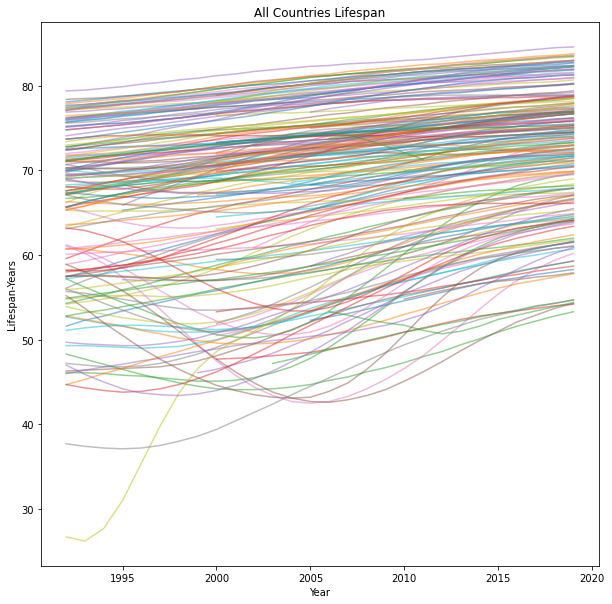

In [4]:
def get_total(country_df): 
    total = country_df.loc['Total', :]
    return total.values.flatten()

def get_years(country_df):
    years = np.array([int(c) for c in country_df.columns])
    return years

def plot_total(country_df):
    years = get_years(country_df)
    total = get_total(country_df)
    plt.plot(years,total, alpha=.5)

def plot_all_counties_total(summary_df):
    for country in countries:
        country_df = summary_df.xs(country, level='Country')
        plot_total(country_df)
    plt.title('All Countries Lifespan')
    plt.ylabel('Lifespan-Years')
    plt.xlabel('Year')
    plt.show()

plot_all_counties_total(summary_df)


The General trend is upwards but there are quite a few counties that had their average lifespan briefly in the 2000s 

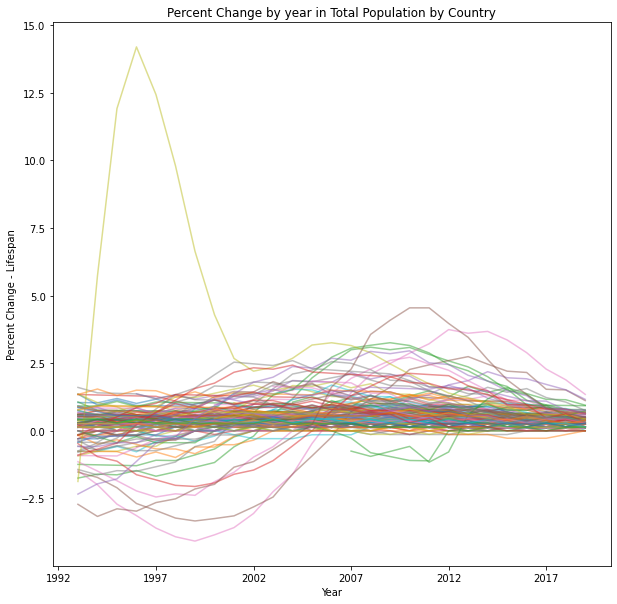

In [5]:
percent_change = pd.DataFrame(summary_df.xs('Total', level='Stat').pct_change(axis=1)) *100
percent_change.T.plot(legend=None, alpha=.5)
plt.title('Percent Change by year in Total Population by Country')
plt.ylabel('Percent Change - Lifespan')
plt.xlabel('Year')
plt.show()

Many of the counties that had negative % change in their expected lifespans later had larger than average % percent changes in their lifespan

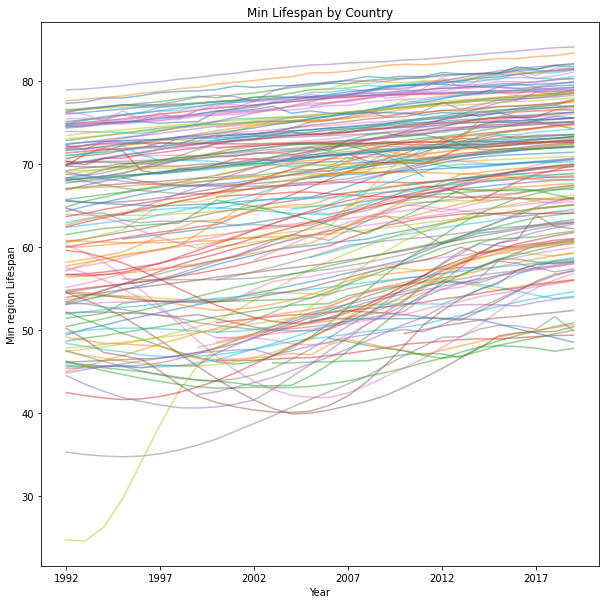

In [6]:
min_df = summary_df.xs('Min', level='Stat')
min_df.T.plot(legend=None, alpha=.5)
plt.title('Min Lifespan by Country')
plt.ylabel('Min region Lifespan')
plt.xlabel('Year')
plt.show()

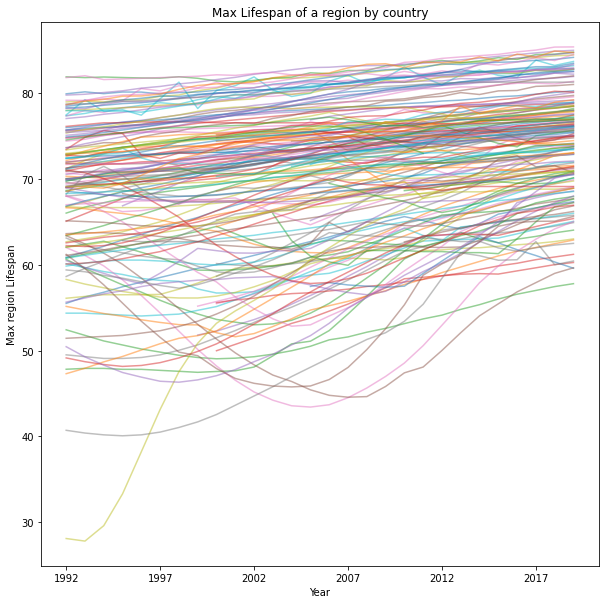

In [7]:
max_df = summary_df.xs('Max', level='Stat')
max_df.T.plot(legend=None, alpha=.5)
plt.title('Max Lifespan of a region by country')
plt.ylabel('Max region Lifespan')
plt.xlabel('Year')
plt.show()

There appears to be a greater spread of countries of max lifespan than with min.

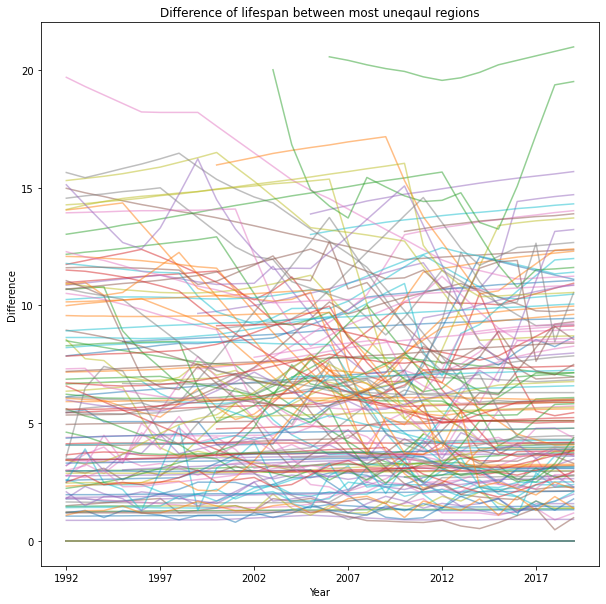

In [8]:
lifespan_difference = max_df - min_df
lifespan_difference.T.plot(legend=None, alpha=.5)
plt.title('Difference of lifespan between most uneqaul regions')
plt.ylabel('Difference')
plt.xlabel('Year')
plt.show()

There is a very large spread in the difference of the lifespan a region with a low expected lifespan and a higher region

A questions this brings up is how does the inquality of lifespan between regions impact the percent change in lifespan of the whole country by year.

This could be answered with linear regression

In [9]:
features = lifespan_difference.values.flatten()
features.shape

(5208,)

In [10]:
targets = percent_change.shift(axis=1, periods=-1).values.flatten()
targets.shape

(5208,)

In [11]:
data=np.array([features, targets]).T
data

array([[6.12      , 1.35658915],
       [6.21      , 0.95602294],
       [6.27      , 1.13636364],
       ...,
       [7.23      , 0.65789474],
       [7.05      , 0.49019608],
       [7.49      ,        nan]])

In [14]:
regression_df = pd.DataFrame(data,columns=['lifespan_difference', 'percent_change']).dropna().reset_index(drop=True)
regression_df

,lifespan_difference,percent_change
0,6.12,1.356589
1,6.21,0.956023
2,6.27,1.136364
3,6.34,0.936330
4,6.40,0.927644
...,...,...
4094,7.81,1.883562
4095,8.91,1.344538
4096,7.76,0.829187
4097,7.23,0.657895


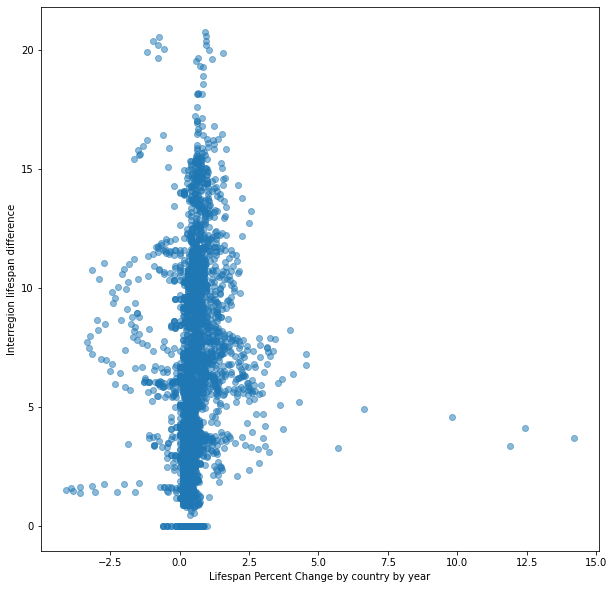

In [35]:
plt.scatter(x=regression_df['percent_change'],
            y=regression_df['lifespan_difference'], alpha=.5)

plt.xlabel('Lifespan Percent Change by country by year')
plt.ylabel('Interregion lifespan difference')
plt.show()

In [25]:
import statsmodels.api as sm

linear_regresssion_results = sm.OLS(endog=regression_df['percent_change'],
                                     exog=regression_df['lifespan_difference']).fit()

linear_regresssion_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:         percent_change   R-squared (uncentered):                   0.251
Model:                            OLS   Adj. R-squared (uncentered):              0.251
Method:                 Least Squares   F-statistic:                              1373.
Date:                Thu, 06 Jan 2022   Prob (F-statistic):                   1.79e-259
Time:                        10:47:40   Log-Likelihood:                         -4705.7
No. Observations:                4099   AIC:                                      9413.
Df Residuals:                    4098   BIC:                                      9420.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
lifespan_difference     0.0646      0.002     37.054      0.000       0.061       0.068
==============================================================================
Omnibus:                     3730.876   Durbin-Watson:                   0.142
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           826051.613
Skew:                           3.664   Prob(JB):                         0.00
Kurtosis:                      72.158   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### There is a positive relationship between inter-region lifespan inquality and lifespan increase.
 
Interpretation
 
1. One possible explanation for this is that once a country has figured out how one region can have a higher lifespan they could easily transfer that to the regions that are lagging behind.
2. In economics this phenomenon is known as [Catch-Up Effect](https://en.wikipedia.org/wiki/Convergence_(economics))